# Create NLKV Samples from Trajectories: A Demo

<br/> This notebook provides a demo to create NLKV samples from trajectories. The trajectories used in this demo are a subset of L001F001. The original trajectories can be obtained from https://zen-traffic-data.net/. An application is required to access the data.<br/>We also provide the created LKV and NLKV samples in files named *LKV.csv* and *NLKV.csv*, respectively.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
from C0_plot import draw_fields
from C1_Preprocess import load_data
from C1_Cal_qkva_field_ZEN import cal_qkva_field,cal_DSD

In [ ]:
# # From ZEN L001F001 trajectories to the sample data
# col_name = ['veh_id','datetime','veh_type','velocity','traffic_lane','lng','lat','kilopost','veh_len','detected_flag']
# original_data = pd.read_csv('L001_F001_trajectory.csv',index_col=0,names=col_name)
# sample_data = original_data[(original_data['datetime']<=73318500)&(original_data['datetime']>=70818700)]
# sample_data.to_csv('sample_trj.csv',header=False)

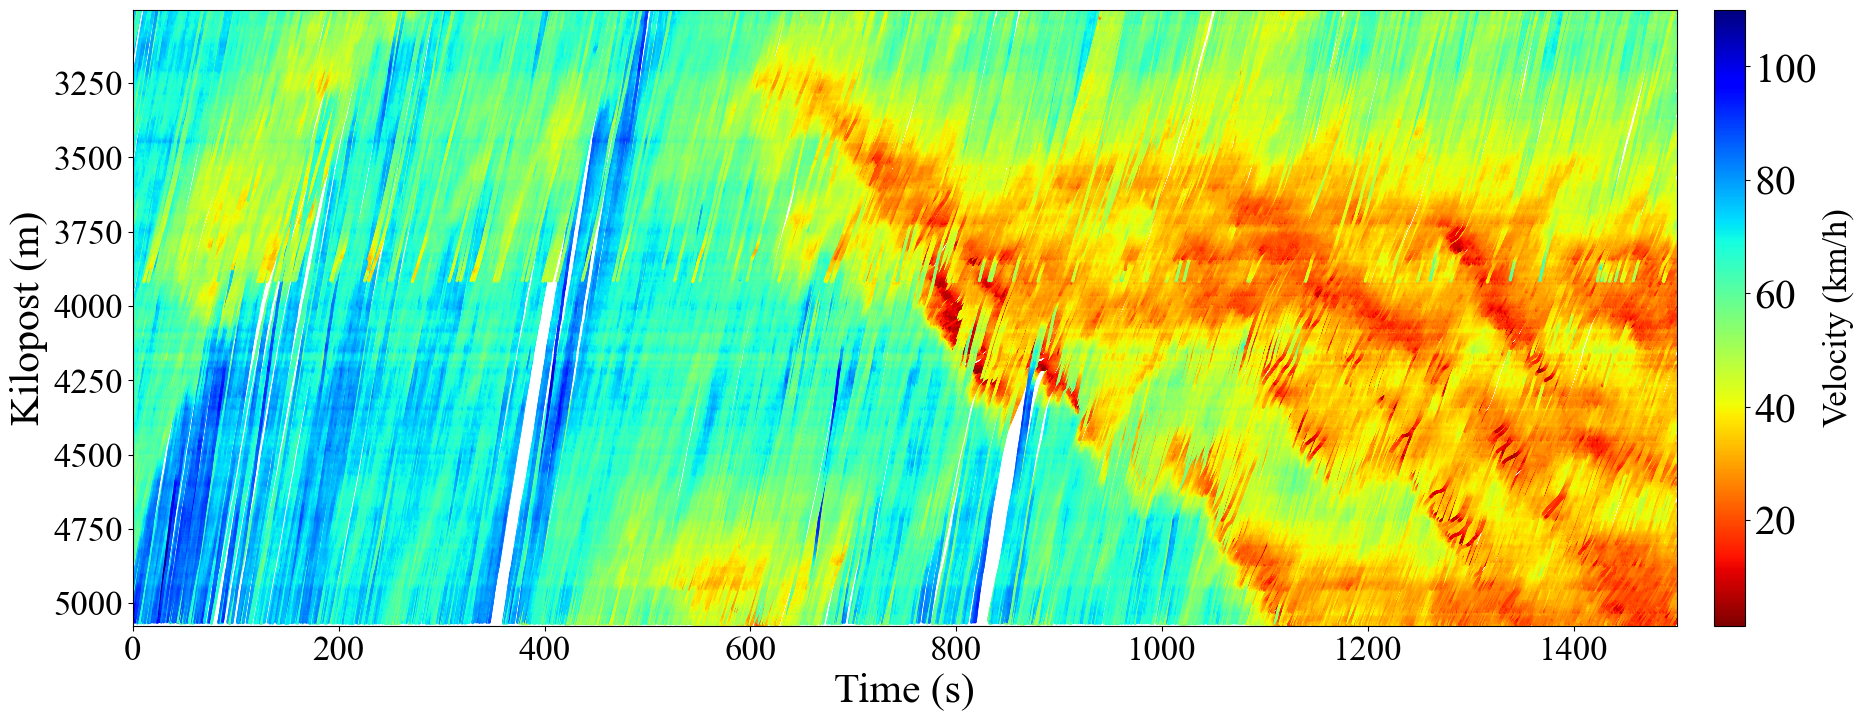

In [4]:
# Preprocess & visualize
trajectory_data = load_data('sample_trj.csv',plot_figure=True,sp_lane=False,inverse=True,cbar=True)

In [5]:
# Fields estimation
m_p = cal_qkva_field(trajectory_data,delta_t=50,delta_x=300,t_step=2,x_step=3,plot_figure=False,rolling=True)

50 300
Calculating acc...


In [16]:
# Calculate anticipated densdity
m_p = cal_DSD(m_p,t_step=2,x_increase=False)

Done!


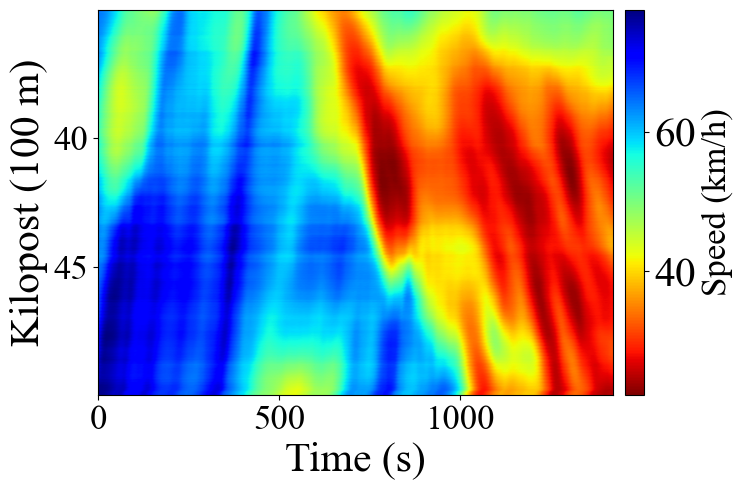

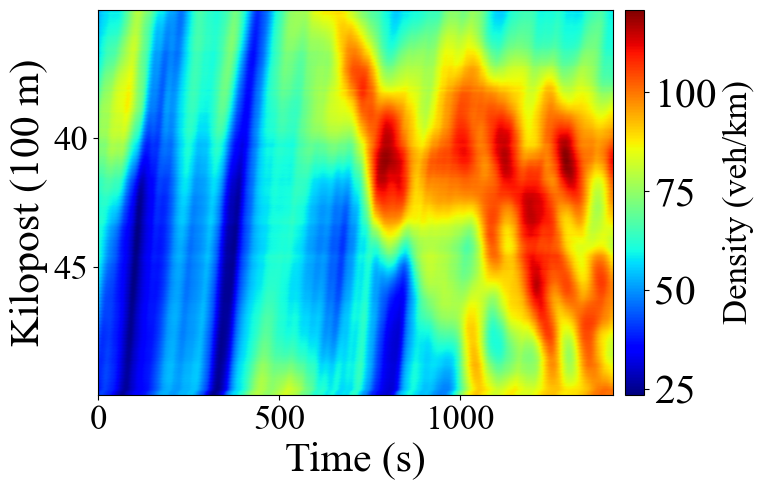

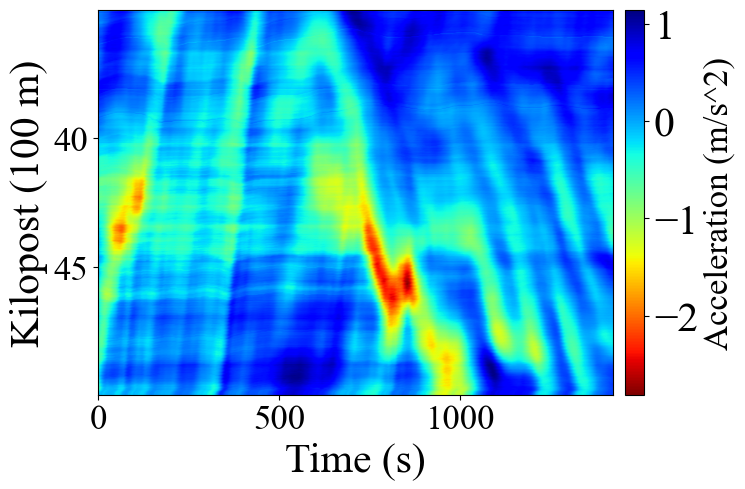

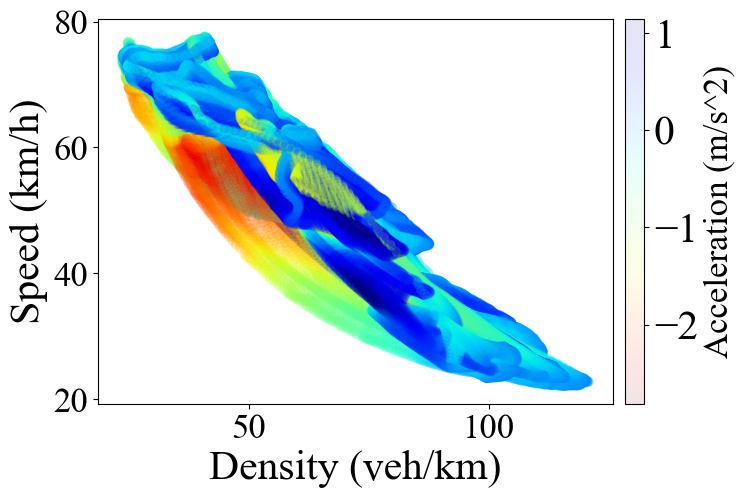

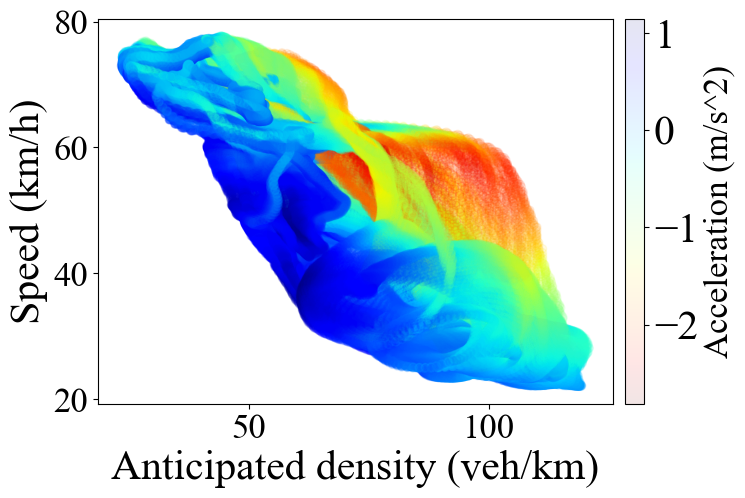

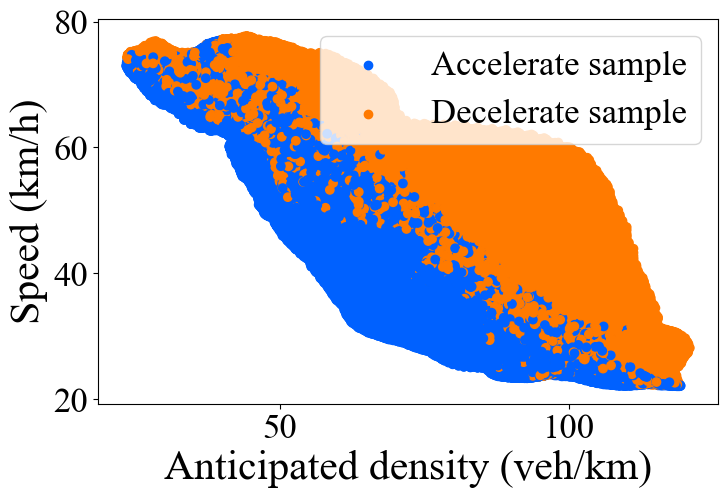

In [17]:
# Visualize fields, LKV, NLKV
draw_fields(m_p,5000,0,1500,3500,subplot=False,kv_FD=True,speed_f=True,density_f=True,acc_f=True,density_a_kv=True,density_a_kq=True,invs=True)

In [18]:
# LKV sampes
LKV = m_p[['k','v']]
LKV.to_csv('LKV.csv')
# NLKV sample
NLKV = m_p[['ka','v']]
NLKV['y'] = np.zeros(shape=len(NLKV))
NLKV['y'][m_p['acc']<=0] = 1
NLKV = NLKV.dropna()
NLKV.to_csv('NLKV.csv')